<a href="https://colab.research.google.com/github/DankHorse/Handwritten-Digit-Classification/blob/main/handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

keras.backend.set_image_data_format('channels_last')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
mnist_train = pd.read_csv('/content/train.csv')
mnist_test = pd.read_csv('/content/test.csv')

display(" train data",mnist_train )
display(" test data",mnist_test )


' train data'

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15483,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15484,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15485,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15486,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


' test data'

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10909,0,0,0,0,0,0,0,0,0,0,...,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10910,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10911,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10912,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
image_size=28*28
image_size

784

In [7]:
# Convert to trian and test data; Preserve original dataset
X_train = mnist_train.drop('label', axis=1).copy()
X_test = mnist_test.copy()
Y_train = mnist_train['label'].copy()

In [8]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,15488.0,15488.0,15488.0,15488.0,15488.0,15488.0,15488.0,15488.0,15488.0,15488.0,...,15487.000000,15487.000000,15487.000000,15487.000000,15487.000000,15487.0,15487.0,15487.0,15487.0,15487.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.138439,0.097114,0.050042,0.016336,0.001421,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.006061,4.159561,3.052663,1.547827,0.176782,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,252.000000,177.000000,22.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
# Normalize values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
# Reshape to 28 x 28 so that we can see the image ie. handwritten number
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

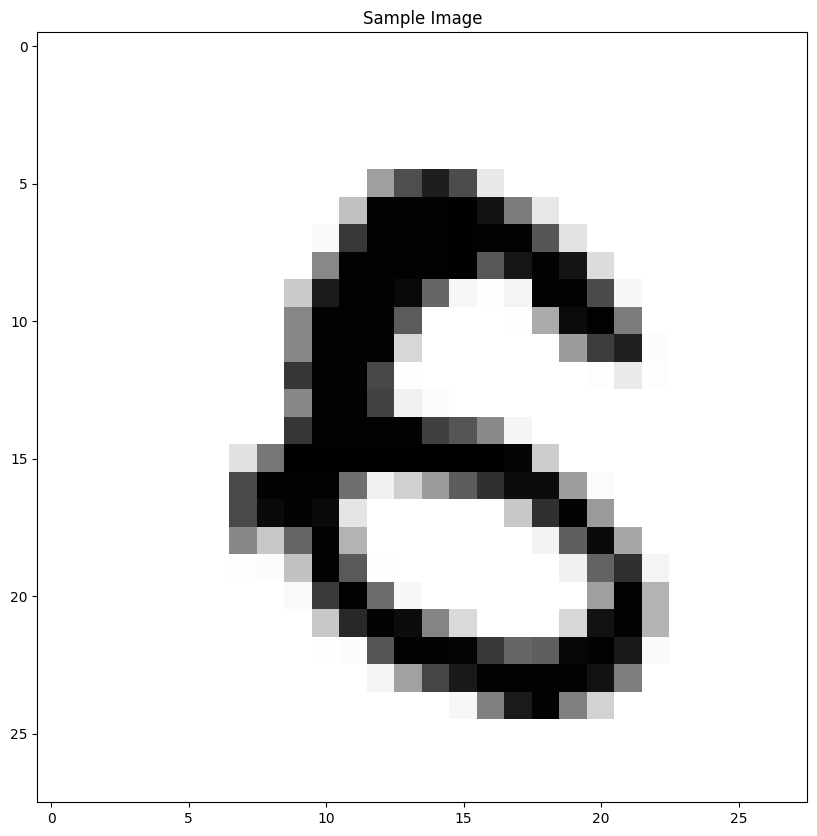

In [11]:
import random
no_images=len(X_train)

# Display random Image
fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(X_train[random.randint(0,no_images), :, :, 0], cmap='Greys', interpolation='nearest')

# replace random.randint(0,no_images) in code above with a number if you want to see specific image.
#This dispalys a random image each time

plt.title("Sample Image")
plt.show()

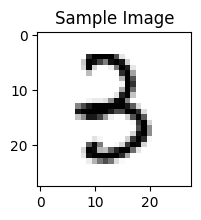

In [12]:
# Display random Image
fig, ax = plt.subplots(figsize=(2,2)) # now fix size is 2 x 2

plt.imshow(X_train[random.randint(0,no_images), :, :, 0], cmap='Greys', interpolation='nearest')
plt.title("Sample Image")
plt.show()

In [13]:
validation_size= 0.2  #you can change this as per our preference


# Split between train and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size= validation_size)

In [14]:
# Get one hot encoding
Y_train = keras.utils.to_categorical(Y_train, num_classes=10)
Y_val = keras.utils.to_categorical(Y_val, num_classes=10)

In [15]:
# Build CNN Model
def CNN():
    model = keras.Sequential()
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='valid', input_shape=(28, 28, 1), name='conv2d_1_1'))
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='same', name='conv2d_1_2'))
    model.add(layers.BatchNormalization(name='bn_1'))
    model.add(layers.Activation('relu', name='relu_1'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_1'))
    model.add(layers.Dropout(0.2, name='drop_1'))
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='valid', name='conv2d_2_1'))
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='same', name='conv2d_2_2'))
    model.add(layers.BatchNormalization(name='bn_2'))
    model.add(layers.Activation('relu', name='relu_2'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_2'))
    model.add(layers.Dropout(0.2, name='drop_2'))
    # FLATTEN > DENSE > CLASSIFICATION
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [16]:
model = CNN()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1_1 (Conv2D)             │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1_2 (Conv2D)             │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_1 (BatchNormalization)       │ (None, 26, 26, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_1 (Activation)             │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mp2d_1 (MaxPooling2D)           │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_1 (Dropout)                │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2_1 (Conv2D)             │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2_2 (Conv2D)             │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_2 (BatchNormalization)       │ (None, 11, 11, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_2 (Activation)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mp2d_2 (MaxPooling2D)           │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_2 (Dropout)                │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,486 (884.71 KB)

 Trainable params: 226,294 (883.96 KB)

 Non-trainable params: 192 (768.00 B)

In [19]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=50, verbose=1)

Epoch 1/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 47s 225ms/step - accuracy: 0.2507 - loss: nan - val_accuracy: 0.1030 - val_loss: nan
Epoch 2/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 43s 223ms/step - accuracy: 0.0970 - loss: nan - val_accuracy: 0.1030 - val_loss: nan
Epoch 3/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 83s 229ms/step - accuracy: 0.0951 - loss: nan - val_accuracy: 0.1030 - val_loss: nan
Epoch 4/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 81s 223ms/step - accuracy: 0.0929 - loss: nan - val_accuracy: 0.1030 - val_loss: nan
Epoch 5/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 43s 222ms/step - accuracy: 0.0933 - loss: nan - val_accuracy: 0.1030 - val_loss: nan
Epoch 6/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 82s 223ms/step - accuracy: 0.0969 - loss: nan - val_accuracy: 0.1030 - val_loss: nan
Epoch 7/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 44s 226ms/step - accuracy: 0.0980 - loss: nan - val_accuracy: 0.1030 - val_loss: nan
Epoch 8/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 81s 221ms/step - accuracy: 0.0935 - loss: nan - val_accuracy: 0.1030 - val_loss: nan


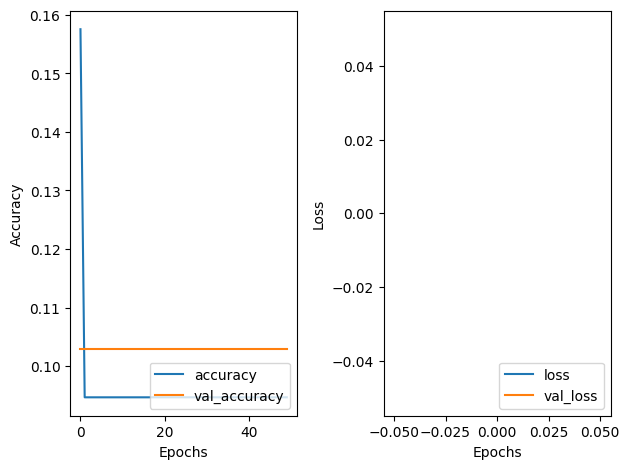

In [20]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [21]:
def predict(model, X, imgs):
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


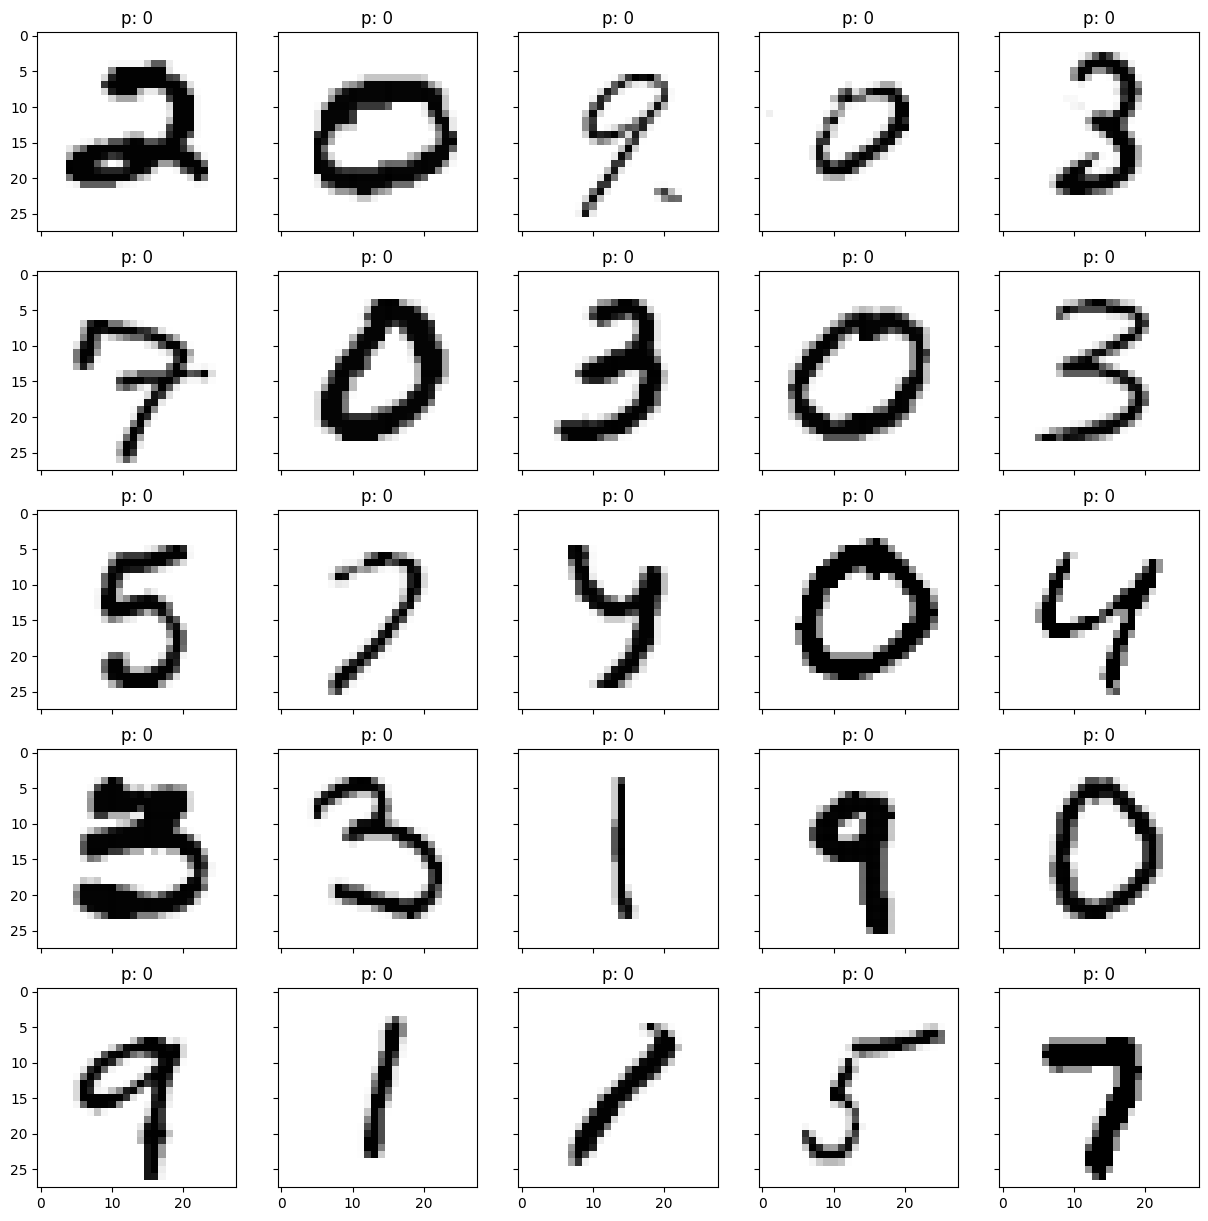

In [22]:
predict(model, X_test, 25)

In [23]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

342/342 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step


In [24]:
name="Kamal" #Add your name here

file_name=name+"_mnist_submission.csv"

In [25]:
y_pred = pd.Series(y_pred, name='Label')
sub = pd.concat([pd.Series(range(1, 28001), name="ImageId"), y_pred], axis=1)
sub.to_csv(file_name, index=False)